In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

file_to_load = "Resources/Datafiniti_Fast_Food_Restaurants.csv"
file_to_load2 = "Resources/crime_data_w_population_and_crime_rate.csv"


fastfood_data = pd.read_csv(file_to_load)
ff_counts = fastfood_data['province'].value_counts()
ff_bystate = pd.DataFrame(ff_counts)
ff_bystate = ff_bystate.reset_index(inplace=False)
ff_bystate = ff_bystate.rename(columns={"index":"state"})
ff_bystate = ff_bystate.rename(columns={"province":"number"})
ff_bystate['number'] = ff_bystate['number'].astype(float)

In [4]:
crime_data = pd.read_csv(file_to_load2)
crime_data[['county','state']] = crime_data['county_name'].str.split(', ',expand=True)
crime_data["crime_rate"] = crime_data['crime_rate_per_100000']/1000
crime_data = crime_data[['state','crime_rate']]
crime_bystate = crime_data.groupby(['state'])
avg_bystate = crime_bystate.mean()
avg_bystate["crime_rate"] = round(avg_bystate["crime_rate"],2)
avg_bystate = avg_bystate.drop(avg_bystate.index[7])
avg_bystate = avg_bystate.reset_index(inplace=False)

In [5]:
combined_df = pd.merge(ff_bystate, avg_bystate, on='state', how='inner')

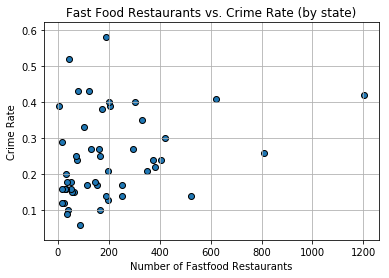

In [6]:
plt.scatter(combined_df["number"],combined_df["crime_rate"], edgecolor="black", marker="o")

plt.title("Fast Food Restaurants vs. Crime Rate (by state)")
plt.ylabel("Crime Rate")
plt.xlabel("Number of Fastfood Restaurants")
plt.grid(True)
plt.savefig("Fast Food Restaurants vs. Crime Rate (by state).png")

plt.show()

In [7]:
file_to_load3 = "Clean_data/cleaned_fastFood.csv"
file_to_load4 = "Clean_data/cleaned_crime_rate.csv"

fastfood_data2 = pd.read_csv(file_to_load3)
ff_bycounty= fastfood_data2.groupby(['county'])
ff_bycounty = ff_bycounty [['number_of_fastfood']]
ff_bycounty = ff_bycounty.sum()

In [10]:
crime_data2 = pd.read_csv(file_to_load4)
crime_data2["crime rate"] = crime_data2['crime rate/100000']/1000
crime_bycounty = crime_data2.groupby(['county'])
crime_bycounty = crime_bycounty[['crime rate']]
crime_bycounty = crime_bycounty.sum()

In [11]:
combined_df2 = pd.merge(ff_bycounty, crime_bycounty, on='county', how='inner')
combined_df2.head()

,number_of_fastfood,crime rate
county,,
Accomack County,1,0.380113
Ada County,18,0.206500
Adair County,8,1.214956
Adams County,38,3.529626
Aiken County,4,0.662703


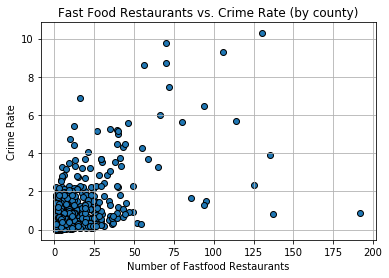

In [12]:
plt.scatter(combined_df2["number_of_fastfood"], combined_df2["crime rate"], edgecolor="black", marker="o")

plt.title("Fast Food Restaurants vs. Crime Rate (by county)")
plt.ylabel("Crime Rate")
plt.xlabel("Number of Fastfood Restaurants")
plt.grid(True)
plt.savefig("Fast Food Restaurants vs. Crime Rate (by county).png")

plt.show()

In [64]:
X = combined_df2["number_of_fastfood"]
Y = combined_df2["crime rate"]

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.pvalues

number_of_fastfood    5.938099e-163
dtype: float64

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             crime rate   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     1041.
Date:                Sun, 20 Jan 2019   Prob (F-statistic):          5.94e-163
Time:                        16:37:12   Log-Likelihood:                -1052.4
No. Observations:                1146   AIC:                             2107.
Df Residuals:                    1145   BIC:                             2112.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
number_of_fastfood     0.0331      0.001     32.261      0.000       0.031       0.035
==============================================================================
Omnibus:                      329.078   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27555.680
Skew:                          -0.237   Prob(JB):                         0.00
Kurtosis:                      27.018   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""